In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
import hurst 

In [32]:
df = pd.read_csv(r"Data\\india_data\\nifty50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date", ascending=True)
df = df.reset_index()
df.head(5)

,index,Index Name,Date,PE,PB,Div Yield,Close,Earnings
0,6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
1,6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
2,6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
3,6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
4,6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


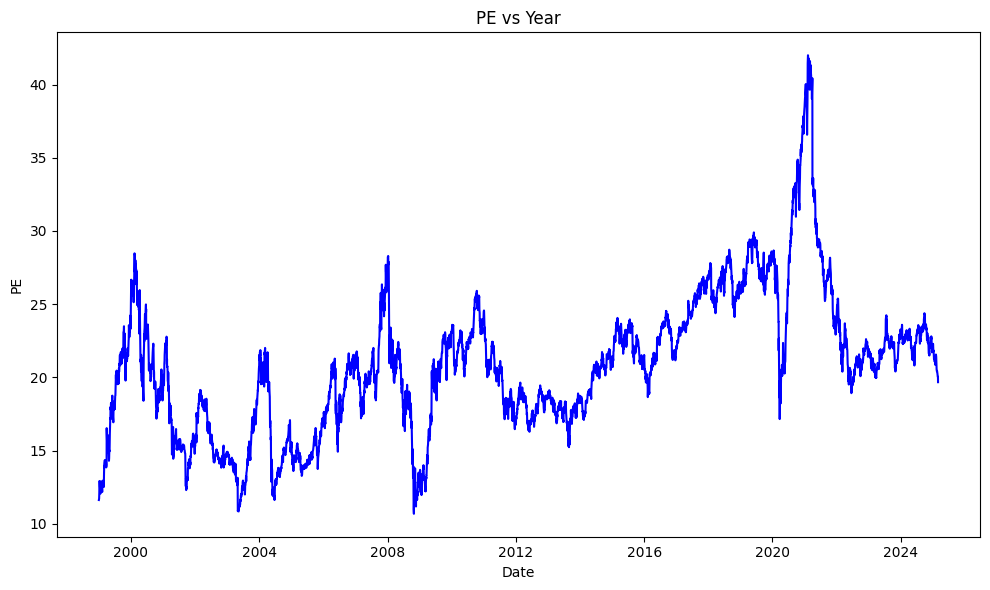

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['PE'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('PE')
plt.title('PE vs Year')
plt.tight_layout()
plt.show()

In [34]:
median_pe = np.median(df["PE"])
median_pe

np.float64(20.82)

In [35]:
df.columns

Index(['index', 'Index Name', 'Date', 'PE', 'PB', 'Div Yield', 'Close',
       'Earnings'],
      dtype='object')

In [36]:
pe_deviations = np.array([])
for i in df["PE"]:
    pe_deviations = np.append(pe_deviations, (i-median_pe))

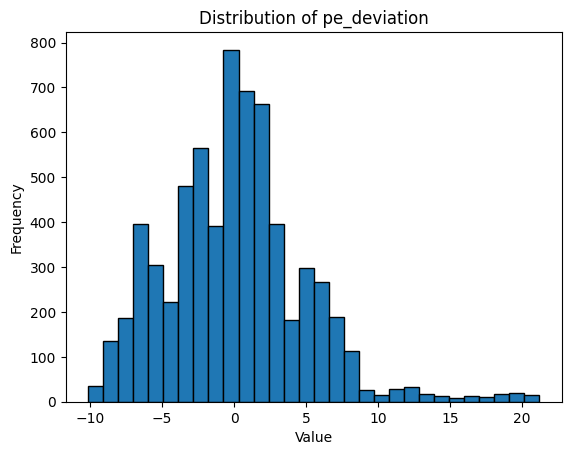

In [37]:
plt.hist(pe_deviations, bins=30, edgecolor='black')
plt.title('Distribution of pe_deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

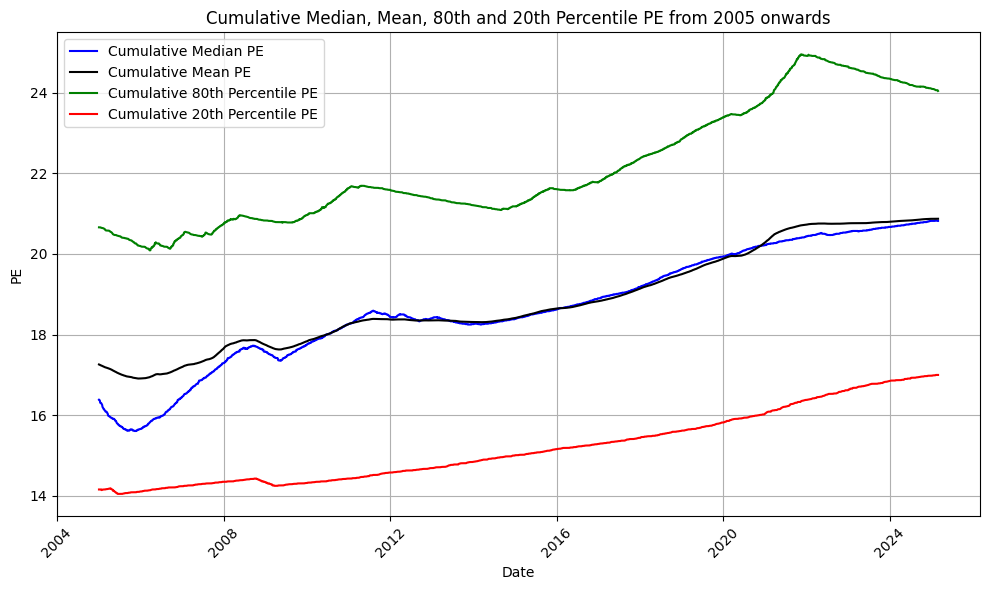

In [41]:
df['Cumulative Median PE'] = df['PE'].expanding().median()
df['Cumulative Mean PE'] = df['PE'].expanding().mean()
df['Cumulative 80th Percentile PE'] = df['PE'].expanding().quantile(0.80)
df['Cumulative 20th Percentile PE'] = df['PE'].expanding().quantile(0.20)

df_filtered = df[df['Date'].dt.year >= 2005]

plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Date'], df_filtered['Cumulative Median PE'], label='Cumulative Median PE', color='blue')
plt.plot(df_filtered['Date'], df_filtered['Cumulative Mean PE'], label='Cumulative Mean PE', color='black')
plt.plot(df_filtered['Date'], df_filtered['Cumulative 80th Percentile PE'], label='Cumulative 80th Percentile PE', color='green')
plt.plot(df_filtered['Date'], df_filtered['Cumulative 20th Percentile PE'], label='Cumulative 20th Percentile PE', color='red')

plt.title('Cumulative Median, Mean, 80th and 20th Percentile PE from 2005 onwards')
plt.xlabel('Date')
plt.ylabel('PE')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

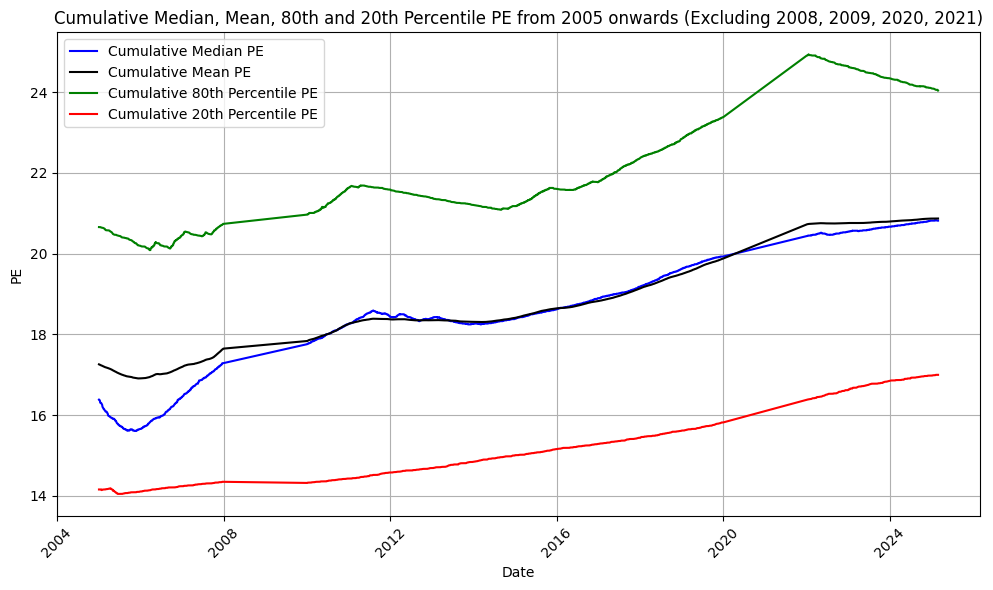

In [39]:
df['Cumulative Median PE'] = df['PE'].expanding().median()
df['Cumulative Mean PE'] = df['PE'].expanding().mean()
df['Cumulative 80th Percentile PE'] = df['PE'].expanding().quantile(0.80)
df['Cumulative 20th Percentile PE'] = df['PE'].expanding().quantile(0.20)

df_filtered_2 = df[df['Date'].dt.year >= 2005]

years_to_remove = [2008, 2009, 2020, 2021]
df_filtered_2 = df_filtered_2[~df_filtered_2['Date'].dt.year.isin(years_to_remove)]

plt.figure(figsize=(10, 6))
plt.plot(df_filtered_2['Date'], df_filtered_2['Cumulative Median PE'], label='Cumulative Median PE', color='blue')
plt.plot(df_filtered_2['Date'], df_filtered_2['Cumulative Mean PE'], label='Cumulative Mean PE', color='black')
plt.plot(df_filtered_2['Date'], df_filtered_2['Cumulative 80th Percentile PE'], label='Cumulative 80th Percentile PE', color='green')
plt.plot(df_filtered_2['Date'], df_filtered_2['Cumulative 20th Percentile PE'], label='Cumulative 20th Percentile PE', color='red')

plt.title('Cumulative Median, Mean, 80th and 20th Percentile PE from 2005 onwards (Excluding 2008, 2009, 2020, 2021)')
plt.xlabel('Date')
plt.ylabel('PE')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [42]:
df2 = pd.read_csv(r"Data\\us_data\\s&p500_data.csv")
df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True)
df2 = df2.sort_values("Date", ascending=True)
df2 = df2.reset_index()
df2.head(5)

,index,Index Name,Date,PE,Close,Earnings
0,0,S&p 500,1927-12-01,15.729730,17.46,1.110
1,1,S&p 500,1928-01-01,15.472198,17.53,1.133
2,2,S&p 500,1928-02-01,14.995671,17.32,1.155
3,3,S&p 500,1928-03-01,15.505523,18.25,1.177
4,4,S&p 500,1928-04-01,16.166667,19.40,1.200


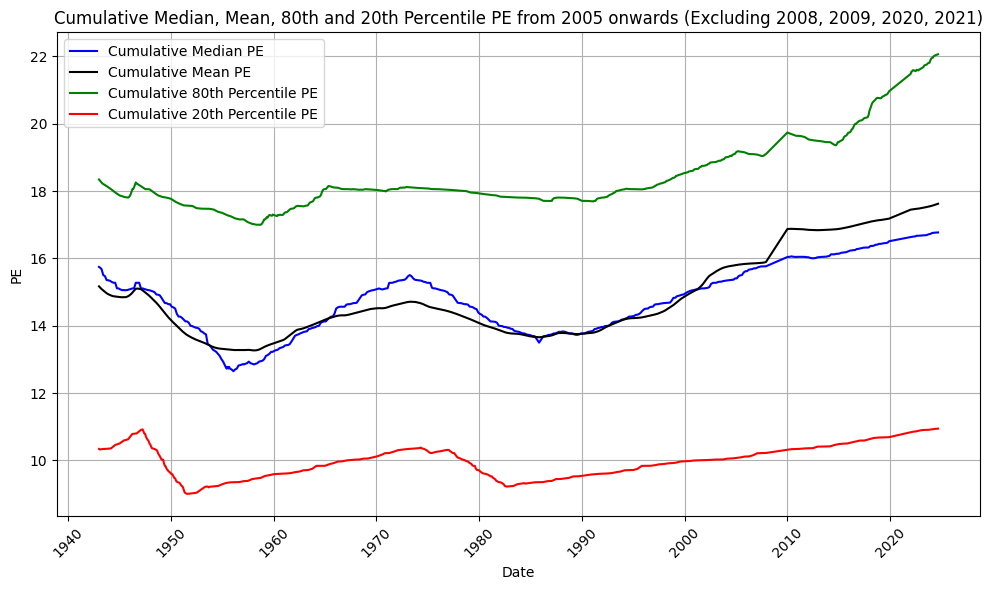

In [43]:
df2['Cumulative Median PE'] = df2['PE'].expanding().median()
df2['Cumulative Mean PE'] = df2['PE'].expanding().mean()
df2['Cumulative 80th Percentile PE'] = df2['PE'].expanding().quantile(0.80)
df2['Cumulative 20th Percentile PE'] = df2['PE'].expanding().quantile(0.20)

df2_filtered_2 = df2[df2['Date'].dt.year >= 1943]

years_to_remove = [2008, 2009, 2020, 2021]
df2_filtered_2 = df2_filtered_2[~df2_filtered_2['Date'].dt.year.isin(years_to_remove)]

plt.figure(figsize=(10, 6))
plt.plot(df2_filtered_2['Date'], df2_filtered_2['Cumulative Median PE'], label='Cumulative Median PE', color='blue')
plt.plot(df2_filtered_2['Date'], df2_filtered_2['Cumulative Mean PE'], label='Cumulative Mean PE', color='black')
plt.plot(df2_filtered_2['Date'], df2_filtered_2['Cumulative 80th Percentile PE'], label='Cumulative 80th Percentile PE', color='green')
plt.plot(df2_filtered_2['Date'], df2_filtered_2['Cumulative 20th Percentile PE'], label='Cumulative 20th Percentile PE', color='red')

plt.title('Cumulative Median, Mean, 80th and 20th Percentile PE from 2005 onwards (Excluding 2008, 2009, 2020, 2021)')
plt.xlabel('Date')
plt.ylabel('PE')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

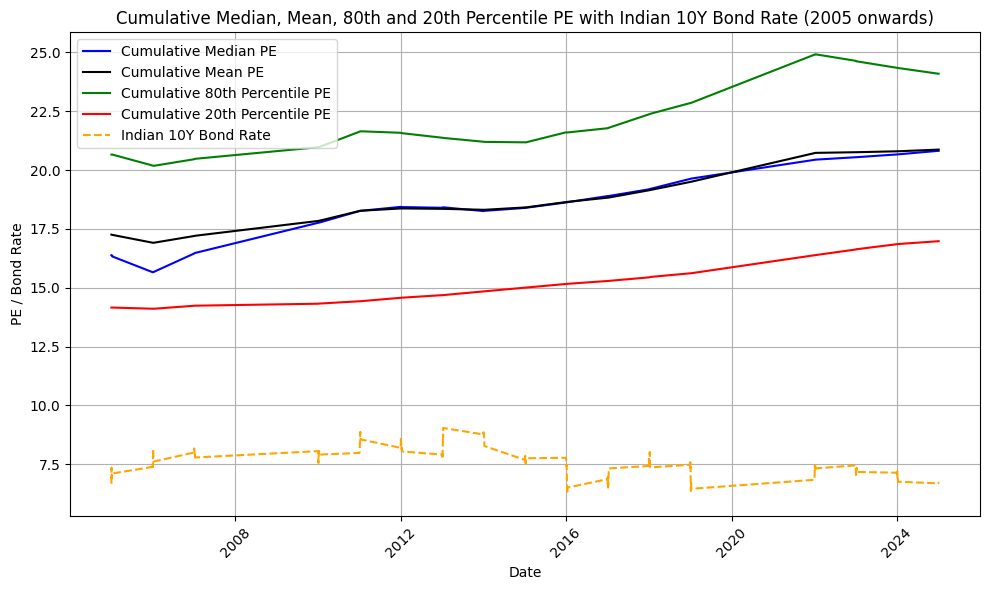

In [53]:
df_ir_filtered = df_ir[df_ir['Date'].dt.year >= 2005]
df_ir_filtered = df_ir_filtered[~df_ir_filtered['Date'].dt.year.isin(years_to_remove)]

df_combined = pd.merge(df_filtered_2, df_ir_filtered[['Date', 'Price']], on='Date', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(df_combined['Date'], df_combined['Cumulative Median PE'], label='Cumulative Median PE', color='blue')
plt.plot(df_combined['Date'], df_combined['Cumulative Mean PE'], label='Cumulative Mean PE', color='black')
plt.plot(df_combined['Date'], df_combined['Cumulative 80th Percentile PE'], label='Cumulative 80th Percentile PE', color='green')
plt.plot(df_combined['Date'], df_combined['Cumulative 20th Percentile PE'], label='Cumulative 20th Percentile PE', color='red')
plt.plot(df_combined['Date'], df_combined['Price'], label='Indian 10Y Bond Rate', color='orange', linestyle='--')

plt.title('Cumulative Median, Mean, 80th and 20th Percentile PE with Indian 10Y Bond Rate (2005 onwards)')
plt.xlabel('Date')
plt.ylabel('PE / Bond Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [55]:
correlation_mean = df_combined['Cumulative Mean PE'].corr(df_combined['Price'])
correlation_median = df_combined['Cumulative Median PE'].corr(df_combined['Price'])
print(f"Correlation between Cumulative Mean PE and Bond Rate: {correlation_mean}")
print(f"Correlation between Cumulative Median PE and Bond Rate: {correlation_median}")

Correlation between Cumulative Mean PE and Bond Rate: -0.43683026922148355
Correlation between Cumulative Median PE and Bond Rate: -0.3484041876765964


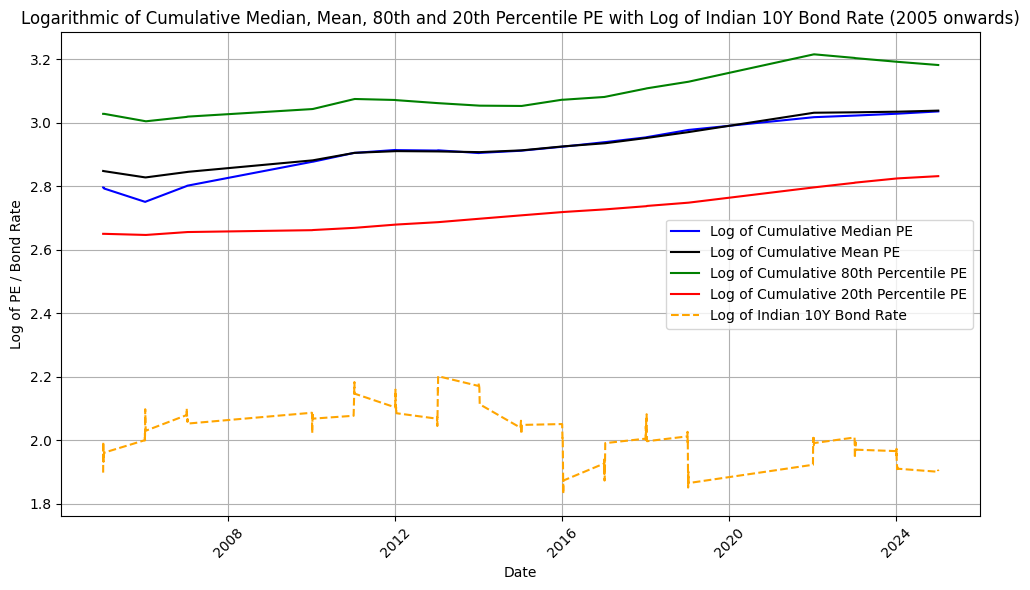

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(df_combined['Date'], np.log(df_combined['Cumulative Median PE']), label='Log of Cumulative Median PE', color='blue')
plt.plot(df_combined['Date'], np.log(df_combined['Cumulative Mean PE']), label='Log of Cumulative Mean PE', color='black')
plt.plot(df_combined['Date'], np.log(df_combined['Cumulative 80th Percentile PE']), label='Log of Cumulative 80th Percentile PE', color='green')
plt.plot(df_combined['Date'], np.log(df_combined['Cumulative 20th Percentile PE']), label='Log of Cumulative 20th Percentile PE', color='red')
plt.plot(df_combined['Date'], np.log(df_combined['Price']), label='Log of Indian 10Y Bond Rate', color='orange', linestyle='--')

plt.title('Logarithmic of Cumulative Median, Mean, 80th and 20th Percentile PE with Log of Indian 10Y Bond Rate (2005 onwards)')
plt.xlabel('Date')
plt.ylabel('Log of PE / Bond Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
def run_backtest(df):
    trades = []   
    open_positions = []   
    
    for index, row in df.iterrows():
        pe, close = row['PE'], row['Close']
        p20, p80 = row['Cumulative_20th_Percentile_PE'], row['Cumulative_80th_Percentile_PE']
        
        if pe < p20:
            deviation = (p20 - pe) / p20    
            amount_to_invest = deviation * 100000  
            qty = amount_to_invest / close
            
            open_positions.append((qty, close))  
            trades.append([row['Date'], 'BUY', qty, close, amount_to_invest])
        
        elif pe > p80 and open_positions:
            total_qty = sum(qty for qty, _ in open_positions)
            total_investment = sum(qty * price for qty, price in open_positions)
            proceeds = total_qty * close
            
            trades.append([row['Date'], 'SELL', total_qty, close, proceeds])
            open_positions = []  
        
    trade_df = pd.DataFrame(trades, columns=["Date", "Action", "Qty", "Price", "Total"])
    trade_df.to_csv("trades6040.csv", index=False)
    print("completed")

run_backtest(df_filtered)

Backtest completed. Trades saved in trades


In [166]:
df_trades = pd.read_csv("trades6040.csv", parse_dates=["Date"])

# Calculate total buy cost
total_buy_cost = df_trades[df_trades["Action"] == "BUY"]["Total"].sum()

# Calculate total sell proceeds
total_sell_proceeds = df_trades[df_trades["Action"] == "SELL"]["Total"].sum()

# Net profit
net_profit = total_sell_proceeds - total_buy_cost

# Return percentage
return_pct = (net_profit / total_buy_cost) * 100 if total_buy_cost > 0 else 0

# Print results
print(f"Total Buy Cost: ₹{total_buy_cost:.2f}")
print(f"Total Sell Proceeds: ₹{total_sell_proceeds:.2f}")
print(f"Net Profit: ₹{net_profit:.2f}")
print(f"Return Percentage: {return_pct:.2f}%")

Total Buy Cost: ₹6386098.17
Total Sell Proceeds: ₹9011206.63
Net Profit: ₹2625108.46
Return Percentage: 41.11%


In [139]:
print(df_filtered.shape)

(5003, 12)


In [140]:
p80 = np.percentile(df['PE'], 80)
p20 = np.percentile(df['PE'], 20)
overval_days = []
underval_days = []
for index, row in df_filtered.iterrows():
    if row["PE"] >= p80:
        start_date = row["Date"]
        for i in range(index + 1, len(df)):
            if df.loc[i, "PE"] < p80:
                end_date = df.loc[i, "Date"]
                days_to_revert = (end_date - start_date).days
                overval_days.append(days_to_revert)
                break
    elif row["PE"] <= p20:
            start_date = row["Date"]
            for i in range(index + 1, len(df)):
                if df.loc[i, "PE"] > p20:
                    end_date = df.loc[i, "Date"]
                    days_to_revert = (end_date - start_date).days
                    underval_days.append(days_to_revert)
                    break
    else : 
        continue

In [141]:
np.mean(overval_days)

np.float64(355.97553017944534)

In [142]:
print(len(overval_days), len(underval_days))

1226 487


In [143]:
np.mean(underval_days)

np.float64(121.16221765913758)

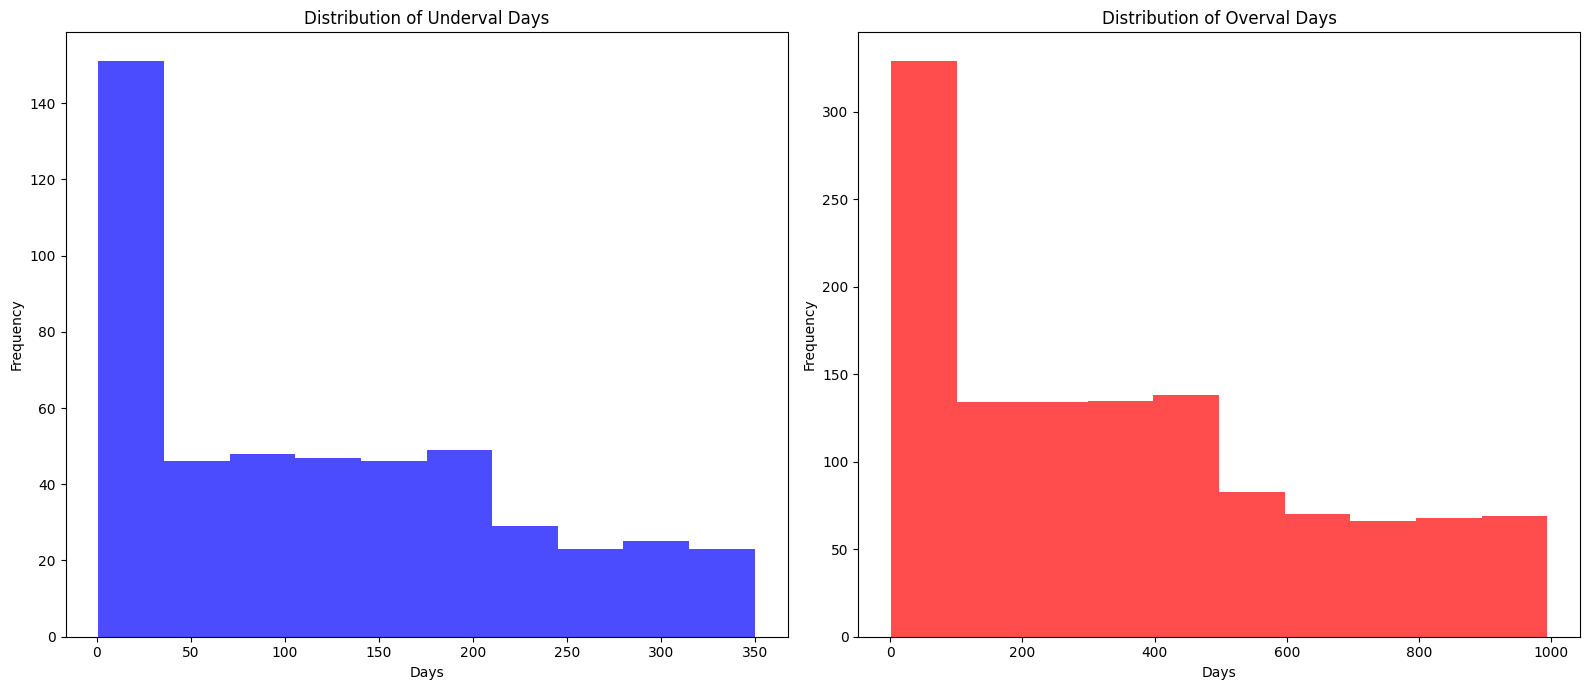

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))  # 2 rows, 1 column
axs[0].hist(underval_days, bins=10, color='blue', alpha=0.7)
axs[0].set_title('Distribution of Underval Days')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Frequency')
axs[1].hist(overval_days, bins=10, color='red', alpha=0.7)
axs[1].set_title('Distribution of Overval Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [145]:
df.shape

(6514, 8)

In [146]:
df.head(5)

,index,Index Name,Date,PE,PB,Div Yield,Close,Earnings
0,6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
1,6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
2,6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
3,6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
4,6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


In [147]:
result = adfuller(df['PE'].dropna())
print(f'ADF: {result[0]}')
print(f'p-value: {result[1]}')

ADF: -3.429684871181939
p-value: 0.009987594027921768


In [148]:
model = AutoReg(df['PE'].dropna(), lags=1)
model_fitted = model.fit()

beta = model_fitted.params.iloc[1]
print(f'Beta: {beta}')

half_life = np.log(2) / -np.log(beta)
print(f'Half-life - mean reversion: {half_life} days')

Beta: 0.9974675418148108
Half-life - mean reversion: 273.358561481487 days


In [149]:
H, c, data_reg = hurst.compute_Hc(df["PE"])
print(f"Hurst Exponent: {H}")

Hurst Exponent: 0.4689294533200903
